In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import t

## Zusammenführen der drei Datensätze in einem Dataframe
#Pfade zuteilen
pfad_1 = 'kiwo.csv'
pfad_2 = 'umsatzdaten_gekuerzt.csv'
pfad_3 = 'wetter.csv
pfad_4 = 'fuf.csv'

# Einlesen der CSVs
daten_1 = pd.read_csv(pfad_1, usecols=['Datum', 'KielerWoche'])
daten_2 = pd.read_csv(pfad_2, usecols=['Datum', 'Warengruppe', 'Umsatz'])
daten_3 = pd.read_csv(pfad_3, usecols=['Datum', 'Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'Windgeschwindigkeit', 'Wettercode'])
daten_4 = pd.read_csv(pfad_4, usecols=['Datum'; 'Ferien', 'Feiertag'])

#Zusammenführen der df
# Datensätze zusammenführen mit Outer Join
merged_df = pd.merge(daten_1, daten_2, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_3, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_4, how='outer', on= 'Datum')

merged_df.shape
print(merged_df)
print(merged_df)


# Print the first 5 rows of the merged DataFrame
print(merged_df.head())



print(merged_df.info())

print(merged_df.describe())

print(merged_df['KielerWoche'].value_counts())
print(merged_df['Warengruppe'].value_counts())
print(merged_df['Windgeschwindigkeit'].value_counts())

print(merged_df['Umsatz'].kurtosis())
print(merged_df['Umsatz'].skew())

print(merged_df['Bewoelkung'].kurtosis())
print(merged_df['Bewoelkung'].skew())

print(merged_df['Temperatur'].kurtosis())
print(merged_df['Temperatur'].skew())

print(merged_df['Windgeschwindigkeit'].kurtosis())
print(merged_df['Windgeschwindigkeit'].skew())

merged_df['Warengruppe'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Verteilung der Warengruppen')
plt.ylabel('')
plt.show()

# Scatterplot 
plt.figure(figsize=(8, 6))

# Scatterplot der Daten
plt.scatter(merged_df['Temperatur'], merged_df['Umsatz'], label='Daten')


# Umsatz im Verhältnis zur Temperatur
plt.title('Umsatz in Bezug zur Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Umsatz')
plt.legend()
plt.grid(True)
plt.show()
# Klassifizierung der Temperaturdaten in 5-Schritten
bin_edges = range(-30, 41, 5)
labels = ['-30--25', '-25--20', '-20--15', '-15--10', '-10--5', '-5-0', '0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40']
merged_df['Temperaturklasse'] = pd.cut(merged_df['Temperatur'], bins=bin_edges, labels=labels[:-1])

# Feature Engineering: Hinzufügen der Jahreszeit
merged_df['Datum'] = pd.to_datetime(merged_df['Datum'])
merged_df['Jahreszeit'] = merged_df['Datum'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Frühling' if x in [3, 4, 5] else 'Sommer' if x in [6, 7, 8] else 'Herbst')

# Modellbildung
X = pd.get_dummies(merged_df[['Temperaturklasse', 'Jahreszeit']], drop_first=True)
X = sm.add_constant(X)
y = merged_df['Umsatz']
model = sm.OLS(y, X).fit()

# Modellbewertung
print(model.summary())

# Grafische Darstellung der Vorhersagen im Vergleich zu den tatsächlichen Umsätzen
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Residuen')
plt.title('Residuenplot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


            Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0      2012-01-01          NaN          NaN     NaN         8.0      9.8250   
1      2012-01-02          NaN          NaN     NaN         7.0      7.4375   
2      2012-01-03          NaN          NaN     NaN         8.0      5.5375   
3      2012-01-04          NaN          NaN     NaN         4.0      5.6875   
4      2012-01-05          NaN          NaN     NaN         6.0      5.3000   
...           ...          ...          ...     ...         ...         ...   
10432  2019-12-27          NaN          NaN     NaN         NaN         NaN   
10433  2019-12-28          NaN          NaN     NaN         NaN         NaN   
10434  2019-12-29          NaN          NaN     NaN         NaN         NaN   
10435  2019-12-30          NaN          NaN     NaN         NaN         NaN   
10436  2019-12-31          NaN          NaN     NaN         NaN         NaN   

       Windgeschwindigkeit  Wettercode  FerienSH  F

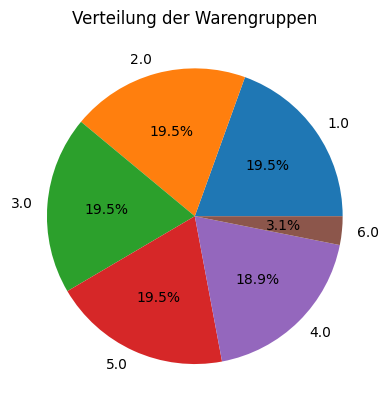

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     602.8
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        07:43:38   Log-Likelihood:                -54330.
No. Observations:                9318   AIC:                         1.087e+05
Df Residuals:                    9285   BIC:                         1.090e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

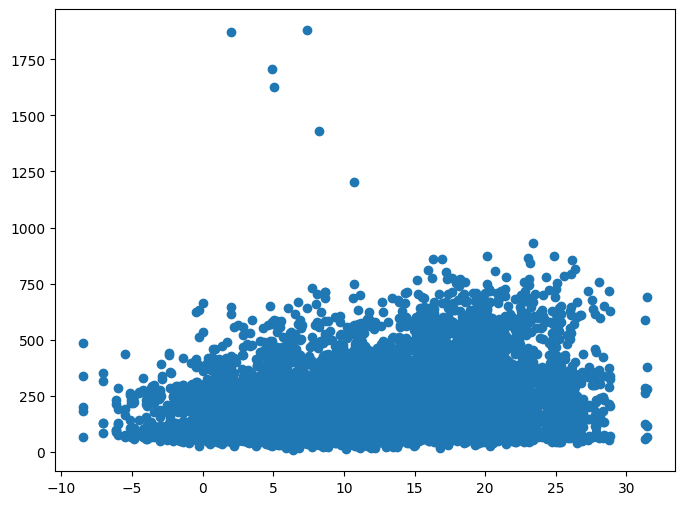

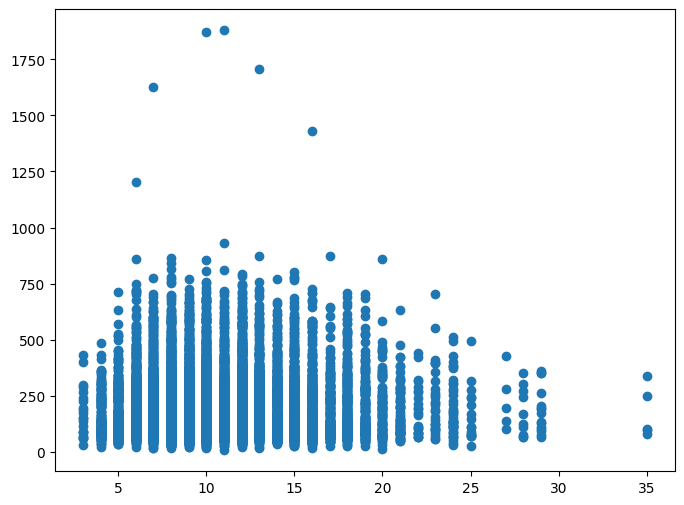

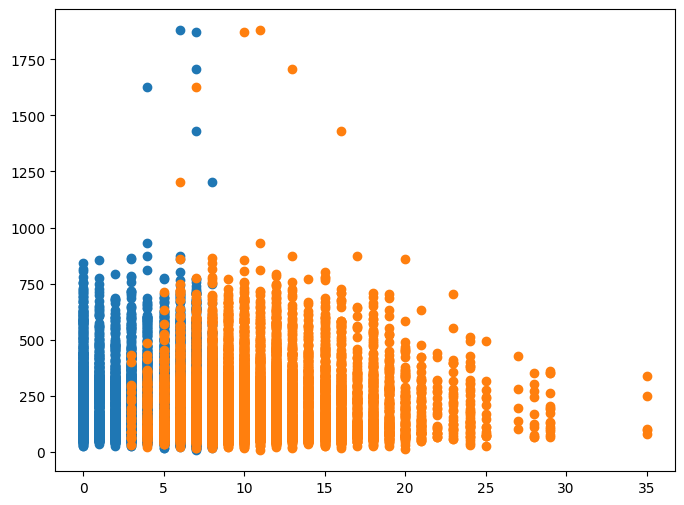

<Figure size 800x600 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import t

## Zusammenführen der drei Datensätze in einem Dataframe
#Pfade zuteilen
pfad_1 = 'kiwo.csv'
pfad_2 = 'umsatzdaten_gekuerzt.csv'
pfad_3 = 'wetter.csv'
pfad_4 = 'fuf.csv'

# Einlesen der CSVs
daten_1 = pd.read_csv(pfad_1, usecols=['Datum', 'KielerWoche'])
daten_2 = pd.read_csv(pfad_2, usecols=['Datum', 'Warengruppe', 'Umsatz'])
daten_3 = pd.read_csv(pfad_3, usecols=['Datum', 'Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'Windgeschwindigkeit', 'Wettercode'])
daten_4 = pd.read_csv(pfad_4, usecols=['Datum', 'FerienSH', 'Feiertag'])

#Zusammenführen der df
# Datensätze zusammenführen mit Outer Join
merged_df = pd.merge(daten_1, daten_2, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_3, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_4, how='outer', on= 'Datum')

merged_df.shape
print(merged_df)
print(merged_df)


# Print the first 5 rows of the merged DataFrame
print(merged_df.head())



print(merged_df.info())

print(merged_df.describe())

print(merged_df['KielerWoche'].value_counts())
print(merged_df['Warengruppe'].value_counts())
print(merged_df['Windgeschwindigkeit'].value_counts())
print(merged_df['FerienSH'].value_counts())
print(merged_df['Feiertag'].value_counts())
print(merged_df['Wettercode'].value_counts())
print(merged_df['Feiertag'].value_counts())


print(merged_df['Umsatz'].kurtosis())
print(merged_df['Umsatz'].skew())

print(merged_df['Bewoelkung'].kurtosis())
print(merged_df['Bewoelkung'].skew())

print(merged_df['Temperatur'].kurtosis())
print(merged_df['Temperatur'].skew())

print(merged_df['Windgeschwindigkeit'].kurtosis())
print(merged_df['Windgeschwindigkeit'].skew())

#Abbildungen 

merged_df['Warengruppe'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Verteilung der Warengruppen')
plt.ylabel('')
plt.show()


# Scatterplot 
plt.figure(figsize=(8, 6))

# Scatterplot der Daten
plt.scatter(merged_df['Temperatur'], merged_df['Umsatz'], label='Daten')

# Scatterplot 
plt.figure(figsize=(8, 6))

# Scatterplot der Daten
plt.scatter(merged_df['Windgeschwindigkeit'], merged_df['Umsatz'], label='Daten')

# Scatterplot 
plt.figure(figsize=(8, 6))
# Scatterplot der Daten
plt.scatter(merged_df['Bewoelkung'], merged_df['Umsatz'], label='Daten')

# Scatterplot der Daten
plt.scatter(merged_df['Windgeschwindigkeit'], merged_df['Umsatz'], label='Daten')

# Scatterplot 
plt.figure(figsize=(8, 6))


import pandas as pd
import statsmodels.formula.api as smf


# Fit the linear model
mod = smf.ols('Umsatz ~ C(Warengruppe) + C(Windgeschwindigkeit)+C(FerienSH)', data=merged_df).fit()

# Print the summary
print(mod.summary())